# Table of contents

1. [Project Description](#ProjectDescription)
2. [Decomposition Plan](#Decomposition)
3. [General Info](#GeneralInfo)
4. [Part 1: Data Preprocessing ](#Preprocessing)
5. [Part 2: Exploratory Data Analysis](#EDA)
6. [Part 3: Test Hypothesis](#Hypo)

### Project Description. <a name="ProjectDescription"></a>

|  Name  |  Description  |
| :----: |  :---- |
|  **Initial conditions**  | Assess the performance of the chain's sales outlets.                  | 
|  **What we have**        | The dataset contains data on purchases made at the building-material retailer Home World. All of its customers have membership cards. Moreover, they can become members of the store's loyalty program for $20 per month. The program includes discounts, information on special offers, and gifts.                                    |
|  **Main question of project**  |                                |
| **Project Description**  | [Link to Project Description](https://www.notion.so/Retail-Assess-Sales-Outlets-Performance-cbef7601d1ab4e8b927953bb58ad4aee)    |
| **Datasets**             | [/datasets/visits_log_us.csv](https://www.notion.so/917c9e5d334e4a148ed02a75b1b79b45?v=0bad2c8da42942c2b2fb781b523034d3&p=cbef7601d1ab4e8b927953bb58ad4aee)  |
|                          | [/datasets/orders_log_us.csv]()  |
|                          | [/datasets/costs_us.csv]()            |

### Decomposition Plan. <a name="Decomposition"></a>

> * Data Preprocessing

 - Check missing values in dataset
 - Change data types: 
   - convert date to datetime.
   - change type of ID from float to integer.
 - Looking for duplicates
 - Categorising data

> * Carry out exploratory data analysis

 - Check the quality of the data.
 - Evaluate and modify the structure of data.
 - Analyze categorical data
 - Look for relationships and patterns.
 - Summarize the data.

> * Assess the performance of the sales outlets

- Cohort Analysis
- Calculate LTV
- Calculate ROI


> * Test statistical hypotheses

### General Info <a name="GeneralInfo"></a>

In [1]:
# functions definitions:
# function to determine if columns in file have null values:
def get_percent_of_na(df, num):
    '''Function count percentage of missing values'''
    count = 0; # first reset counter.
    df = df.copy() # copy dataframe in new structure.
    amount = (df.isna().sum() / df.shape[0])
    
    for column, percent in zip(amount.index, amount.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
        
    if count != 0:
        print('\033[1m' + 'There are {} columns with NA.'.format(count) + '\033[0m')
    else: 
        print()
        print('\033[1m' + 'There are no columns with NA.' + '\033[0m')

def get_percent_of_na_table(df, num):
    '''Function convert value to percentage'''
    df_nulls = pd.DataFrame(df.isna().sum(), columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0], num) * 100
    return df_nulls

def get_info(df):
    '''Function to display helpfull information about each file.'''
    print('Head:')
    display(df.head())
    print('-'*110)
    
    print('Info:')
    display(df.info())
    print('-'*110)
    
    print('Describe:')
    display(df.describe())
    display(df.describe(include=['category', 'object', 'float64']))
    print('-'*110)
    
    print('Percent of columns with nulls:')
    display(get_percent_of_na_table(df, 2))
    print('-'*110)
    
    print('Shape:')
    print(df.shape)
    print('-'*110)
    
    print('Duplicated:')
    print('\033[1m' + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + '\033[0m')
    print('/'*110)

def get_info_date(df, column):
    df['date']  = df[column].dt.date
    df['week']  = df[column].astype('datetime64[W]')
    df['month'] = df[column].astype('datetime64[M]')
    df['year']  = df[column].astype('datetime64[Y]')
    return df

def plot_monthly_weekly_user_activity(df, title, col_1):
    mau_total = df.groupby(['year', col_1]).agg({'CustomerID':'nunique'}).reset_index()
    plt.figure(figsize=(16,5))
    plt.plot(mau_total[col_1], mau_total['CustomerID'])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Users')
    plt.show()

def plot_daily_user_activity(df, title):
    dau_total = df.groupby('date').agg({'CustomerID':'nunique'}).reset_index()
    plt.figure(figsize=(16,5))
    plt.plot(dau_total['date'], dau_total['CustomerID'])
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Users')
    plt.show()

# for calculate number of time active uses implement function:
def total(df, time_1, time_2, uid, filtr):
    total = (
    df.groupby([time_1, time_2])
    .agg({uid:filtr})
    .mean()
    .astype('int64')
    .values
    )
    return total

def draw_barplot(col1, col2, df, title, ylabel, xlabel, degree):
    sns.set(style='dark')
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,8))
    ax = sns.barplot(x=col1, y=col2, data=df)
    plt.locs, labels = plt.xticks()
    #plt.yticks(np.arange(160, 640, step=20))
    plt.setp(labels, rotation=degree)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

def draw_2_plots(df, col_x, col_y_1, col_y_2, title, ylabel, xlabel):
    df.plot(x=col_x, y=[col_y_1, col_y_2], kind="bar",figsize=(16,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

def draw_plot(df, col_1, col_2, title, xlabel, ylabel):
    plt.figure(figsize=(16,5))
    plt.plot(df[col_1], df[col_2])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_dist(df, col, title, ylabel, xlabel):
    sns.set(style='dark')
    sns.set_style("whitegrid")
    sns.set(rc={"figure.figsize": (16, 8)})
    ax = sns.distplot(df[col], bins=30, kde=True)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.xlim(-15000, 15000)
    plt.ylim(0, 0.0005)
    plt.show()

def draw_outliers(df, col1, col2):
    x_values = pd.Series(range(0,len(merged['revenue'])))
    plt.figure(figsize=[16,8])
    sns.scatterplot(data=df, x=x_values, y=df[col1], hue=col2)
    plt.grid(True)
    plt.title('Scatter chart of order prices')
    plt.ylabel('Revenue, $')
    plt.xlabel('Number of purchases')
    #plt.yticks(np.arange(0, 21000, step=1000))
    plt.show()    

def draw_bar(col1, col2, df, title, ylabel, xlabel, degree):
    sns.set(style='dark')
    sns.set_style("whitegrid")
    plt.figure(figsize=(16,8))
    ax = sns.barplot(x=col1, y=col2, data=df)
    plt.locs, labels = plt.xticks()
    #plt.yticks(np.arange(160, 640, step=20))
    plt.setp(labels, rotation=degree)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

In [2]:
# import all packages
import pandas as pd
import numpy as np

import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

%matplotlib inline

In [3]:
print('Pandas version library:',pd.__version__)
print('Numpy version library:', np.__version__)
print('Seaborn version library:', sns.__version__)
# print('Anaconda version package:', sys.version)

Pandas version library: 0.25.1
Numpy version library: 1.18.5
Seaborn version library: 0.9.0


In [4]:
try:
    df_retail = pd.read_csv('./datasets/retail_dataset_us.csv', parse_dates=['purchasedate'])
    df_products = pd.read_csv('./datasets/product_codes_us.csv', sep=';')
except:
    df_retail = pd.read_csv('https://www.notion.so/917c9e5d334e4a148ed02a75b1b79b45?v=0bad2c8da42942c2b2fb781b523034d3&p=cbef7601d1ab4e8b927953bb58ad4aee', parse_dates=['purchasedate'])
    df_products = pd.read_csv('https://www.notion.so/917c9e5d334e4a148ed02a75b1b79b45?v=0bad2c8da42942c2b2fb781b523034d3&p=cbef7601d1ab4e8b927953bb58ad4aee', sep=';')

In [5]:
get_info(df_retail)
get_info(df_products)

Head:


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427.0,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389.0,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182.0,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522.0,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151.0,1,Shop 28


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105335 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         105335 non-null object
item_ID            105335 non-null object
Quantity           105335 non-null int64
purchasedate       105335 non-null datetime64[ns]
CustomerID         69125 non-null float64
loyalty_program    105335 non-null int64
ShopID             105335 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.6+ MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,Quantity,CustomerID,loyalty_program
count,105335.000000,69125.000000,105335.000000
mean,7.821218,21019.302047,0.226345
std,327.946695,1765.444679,0.418467
min,-74216.000000,18025.000000,0.000000
25%,0.000000,19544.000000,0.000000
50%,2.000000,20990.000000,0.000000
75%,7.000000,22659.000000,0.000000
max,74214.000000,23962.000000,1.000000


,purchaseid,item_ID,CustomerID,ShopID
count,105335,105335,69125.000000,105335
unique,4894,3159,NaN,31
top,537434,85123A,NaN,Shop 0
freq,675,565,NaN,38389
mean,NaN,NaN,21019.302047,NaN
std,NaN,NaN,1765.444679,NaN
min,NaN,NaN,18025.000000,NaN
25%,NaN,NaN,19544.000000,NaN
50%,NaN,NaN,20990.000000,NaN
75%,NaN,NaN,22659.000000,NaN


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
purchaseid,0,0.0
item_ID,0,0.0
Quantity,0,0.0
purchasedate,0,0.0
CustomerID,36210,34.0
loyalty_program,0,0.0
ShopID,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(105335, 7)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 1033 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////
Head:


,productID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
productID        3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


,productID,price_per_one
count,3159,3159.000000
unique,3159,NaN
top,22418,NaN
freq,1,NaN
mean,NaN,2.954495
std,NaN,7.213808
min,NaN,0.000000
25%,NaN,0.650000
50%,NaN,1.450000
75%,NaN,3.290000


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
productID,0,0.0
price_per_one,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(3159, 2)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [6]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
productID        3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


### Part 1: Data Preprocessing <a name="Preprocessing"></a>

In [7]:
df_retail = df_retail.astype(object).replace(np.nan, 'None')
df_retail = df_retail.drop_duplicates()

In [8]:
get_info(df_retail)

Head:


,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 105334
Data columns (total 7 columns):
purchaseid         104302 non-null object
item_ID            104302 non-null object
Quantity           104302 non-null int64
purchasedate       104302 non-null datetime64[ns]
CustomerID         104302 non-null object
loyalty_program    104302 non-null int64
ShopID             104302 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 6.4+ MB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,Quantity,loyalty_program
count,104302.000000,104302.000000
mean,7.883003,0.224464
std,329.565540,0.417231
min,-74216.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,0.000000
75%,7.000000,0.000000
max,74214.000000,1.000000


,purchaseid,item_ID,CustomerID,ShopID
count,104302,104302,104302,104302
unique,4894,3159,1750,31
top,537434,85123A,None,Shop 0
freq,675,561,36148,38303


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
purchaseid,0,0.0
item_ID,0,0.0
Quantity,0,0.0
purchasedate,0,0.0
CustomerID,0,0.0
loyalty_program,0,0.0
ShopID,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(104302, 7)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


In [9]:
df_products['price_per_one'] = df_products['price_per_one'].fillna(2.954495)
df_products['productID'] = df_products['productID'].astype(object).replace(np.nan, 'None')
df_products.columns = ['item_ID','price_per_one']

In [10]:
df_retail = get_info_date(df_retail, 'purchasedate')

In [11]:
df_retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,date,week,month,year
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,2016-12-08,2016-12-01,2016-01-01
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,2016-12-08,2016-12-01,2016-01-01
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,2016-12-08,2016-12-01,2016-01-01
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2017-02-09,2017-02-01,2017-01-01
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,2017-02-09,2017-02-01,2017-01-01


In [12]:
get_info(df_products)

Head:


,item_ID,price_per_one
0,10002,0.85
1,10080,0.85
2,10120,0.21
3,10123C,0.65
4,10124A,0.42


--------------------------------------------------------------------------------------------------------------
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3159 entries, 0 to 3158
Data columns (total 2 columns):
item_ID          3159 non-null object
price_per_one    3159 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


None

--------------------------------------------------------------------------------------------------------------
Describe:


,price_per_one
count,3159.000000
mean,2.954495
std,7.213808
min,0.000000
25%,0.650000
50%,1.450000
75%,3.290000
max,175.000000


,item_ID,price_per_one
count,3159,3159.000000
unique,3159,NaN
top,22418,NaN
freq,1,NaN
mean,NaN,2.954495
std,NaN,7.213808
min,NaN,0.000000
25%,NaN,0.650000
50%,NaN,1.450000
75%,NaN,3.290000


--------------------------------------------------------------------------------------------------------------
Percent of columns with nulls:


,Missing Values,Percent of Nulls
item_ID,0,0.0
price_per_one,0,0.0


--------------------------------------------------------------------------------------------------------------
Shape:
(3159, 2)
--------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows. 

//////////////////////////////////////////////////////////////////////////////////////////////////////////////


- These datasets have missing values and duplicates: df_retail (column CustomerID) df_products (column price_per_one) 
- The missing values are related to the CustomerID - they cannot be deleted, as this will delete more than half of the other records. Substitution of a frequently occurring ID is also not allowed. The option was selected to replace the missing values with the None value.
- Missing values for a column "price_per_one" have been replaced with the average "price_per_one".
- Duplicated values in dataset df_products dropped. 

### Part 2: Exploratory Data Analysis

In [13]:
df_retail.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,date,week,month,year
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,2016-12-08,2016-12-01,2016-01-01
1,538862,22195,0,2016-12-14 14:11:00,22389,1,Shop 2,2016-12-14,2016-12-08,2016-12-01,2016-01-01
2,538855,21239,7,2016-12-14 13:50:00,22182,1,Shop 3,2016-12-14,2016-12-08,2016-12-01,2016-01-01
3,543543,22271,0,2017-02-09 15:33:00,23522,1,Shop 28,2017-02-09,2017-02-09,2017-02-01,2017-01-01
4,543812,79321,0,2017-02-13 14:40:00,23151,1,Shop 28,2017-02-13,2017-02-09,2017-02-01,2017-01-01


In [14]:
mau_total = total(df_retail, 'year', 'month', 'CustomerID', 'nunique')
wau_total = total(df_retail, 'year', 'week', 'CustomerID', 'nunique')
dau_total = total(df_retail, 'date', 'date', 'CustomerID', 'nunique')
print('The number of monthly active users:', mau_total)
print('The number of week active users', wau_total)
print('The number of daily active users', dau_total)

The number of monthly active users: [844]
The number of week active users [250]
The number of daily active users [53]


C:\Users\Kanafin\Anaconda3\envs\pandas\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


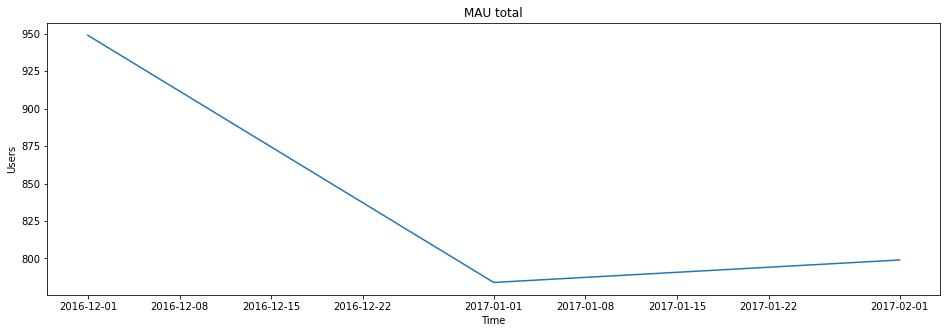

In [15]:
plot_monthly_weekly_user_activity(df_retail, 'MAU total', 'month')

* The graph shows that since the beginning of December there has been a decrease in the number of buyers and by January it reaches its minimum in this time period. 
* This is due to the fact that on holidays, people stop doing repairs and construction.

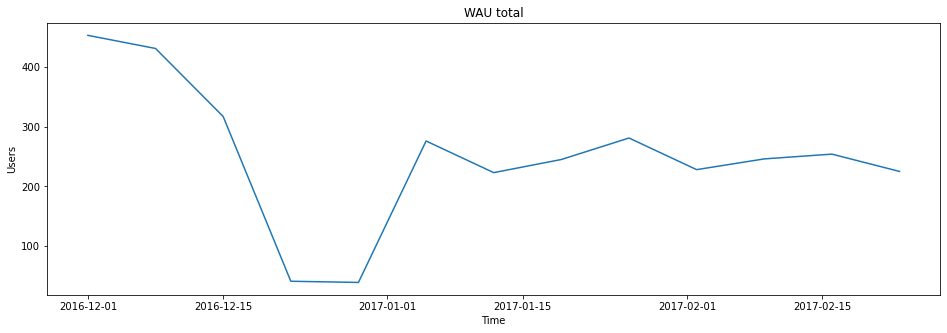

In [16]:
plot_monthly_weekly_user_activity(df_retail, 'WAU total', 'week')

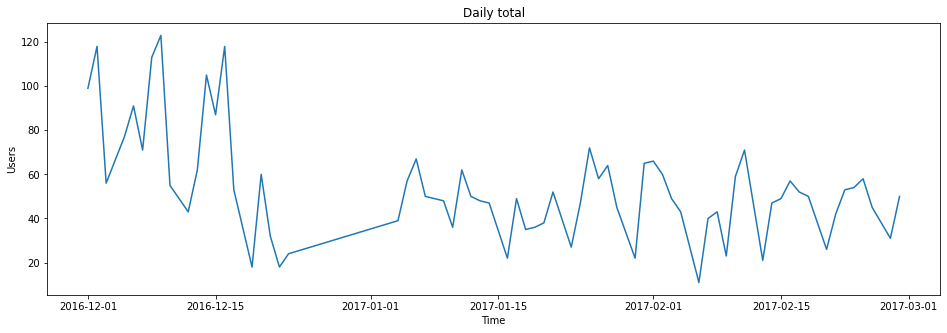

In [17]:
plot_daily_user_activity(df_retail, 'Daily total')

## Analysis of store sales

In [18]:
merged = df_retail.merge(df_products, on='item_ID')
merged['revenue'] = merged['Quantity'] * merged['price_per_one']
merged.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,date,week,month,year,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,2016-12-08,2016-12-01,2016-01-01,0.42,4.62
1,541104,21873,0,2017-01-13 14:29:00,None,0,Shop 0,2017-01-13,2017-01-12,2017-01-01,2017-01-01,0.42,0.00
2,540418,21873,1,2017-01-07 11:04:00,None,0,Shop 0,2017-01-07,2017-01-05,2017-01-01,2017-01-01,0.42,0.42
3,541516,21873,2,2017-01-18 17:34:00,None,0,Shop 0,2017-01-18,2017-01-12,2017-01-01,2017-01-01,0.42,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,2017-01-19,2017-01-19,2017-01-01,2017-01-01,0.42,14.70


In [ ]:
merged.to_csv('dashboard_dataset.csv')

In [37]:
shops_with_loyalty = (
    merged.query('loyalty_program == "1"')
    .groupby('ShopID', as_index=False)
    .agg({'revenue':'sum'})
)
display(users_with_loyalty.head())

,ShopID,revenue
0,Shop 0,6789.24
1,Shop 1,5754.82
2,Shop 10,4880.96
3,Shop 11,7534.73
4,Shop 12,8391.67


In [38]:
shops_without_loyalty = (
    merged.query('loyalty_program == "0"')
    .groupby('ShopID', as_index=False)
    .agg({'purchaseid' : pd.Series.nunique, 'revenue':'sum'})
)
display(users_without_loyalty.head())

,ShopID,purchaseid,revenue
0,Shop 0,836,98382.34
1,Shop 1,102,18289.01
2,Shop 10,89,25121.08
3,Shop 11,99,15729.61
4,Shop 12,83,12335.64


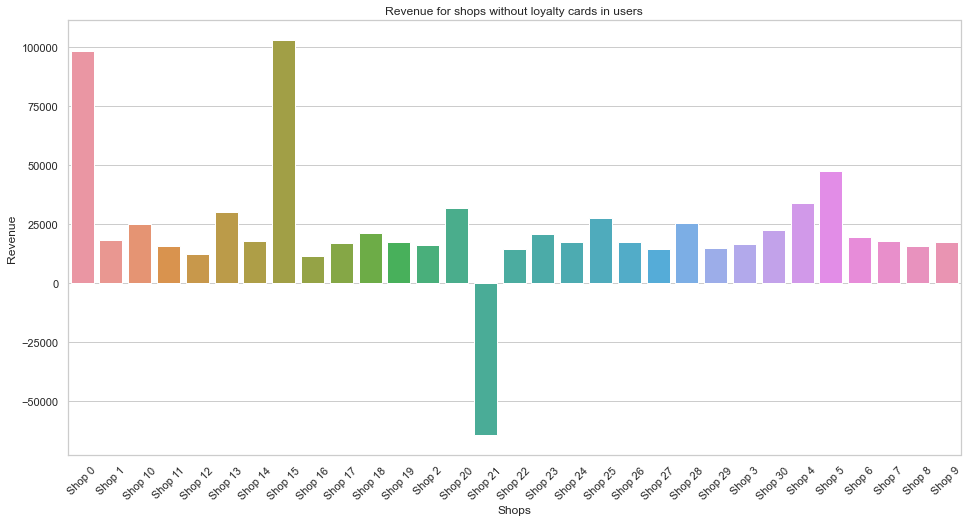

In [39]:
draw_bar('ShopID','revenue', shops_without_loyalty, 'Revenue for shops without loyalty cards in users', 'Revenue', 'Shops', 45)

* The maximum values are given by shop 0 and shop 14.
* Strange value for the shop 21. The total indicator is negative. Possible data error.
* Maximum value for revenue - 100000. 

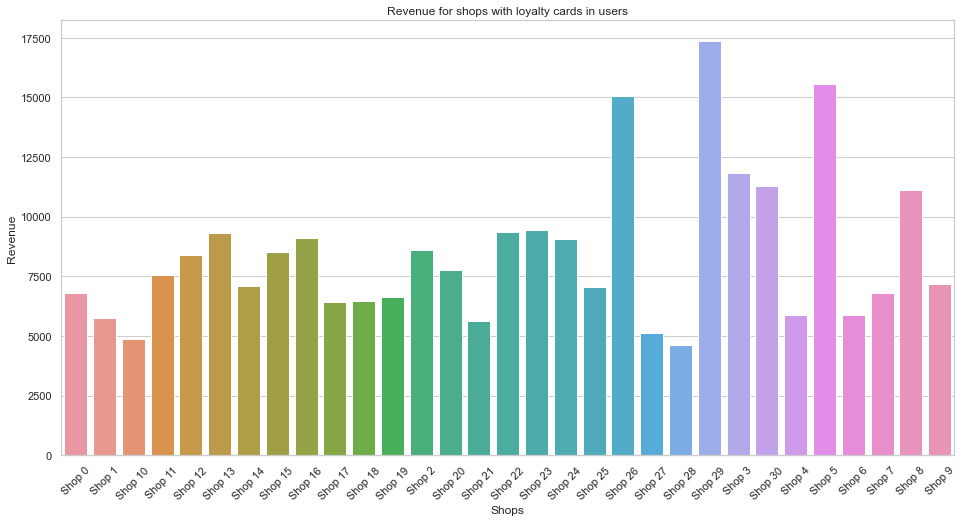

In [40]:
draw_bar('ShopID','revenue', shops_with_loyalty, 'Revenue for shops with loyalty cards in users', 'Revenue', 'Shops', 45)

* The maximum values are given by shop 29, shop 5 and shop 26.
* Maximum value for revenue - 17500. 
* Compared to the prev. plot revenue for shops without a customer loyalty card, the values are lower.

In [78]:
months_shops_revenue = (
    merged.groupby(['month','ShopID'])
    .agg({'revenue':'sum'})
)
months_shops_revenue.head()

revenue
month      ShopID           
2016-12-01 Shop 0   52321.20
           Shop 1    5447.02
           Shop 10  11667.90
           Shop 11   8172.56
           Shop 12  11131.43

C:\Users\Kanafin\Anaconda3\envs\pandas\lib\site-packages\pandas\plotting\_matplotlib\core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


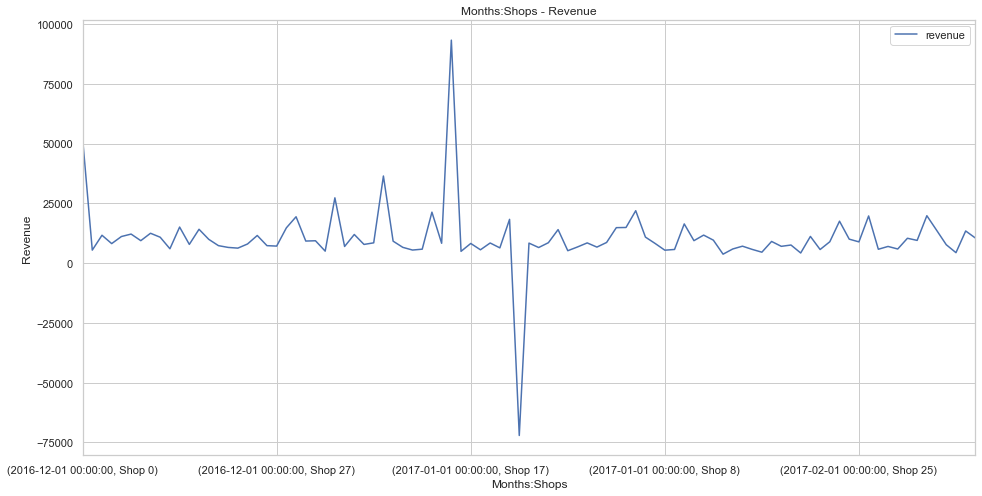

In [79]:
months_shops_revenue.plot(figsize=(16,8))
plt.title('Months:Shops - Revenue')
plt.ylabel('Revenue')
plt.xlabel('Months:Shops')
plt.show()

* Positive peak values were observed in December. 
* Negative peak was in January. 

In [125]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104302 entries, 0 to 104301
Data columns (total 12 columns):
purchaseid         104302 non-null object
item_ID            104302 non-null object
Quantity           104302 non-null int64
purchasedate       104302 non-null datetime64[ns]
CustomerID         104302 non-null object
loyalty_program    104302 non-null int64
ShopID             104302 non-null object
date               104302 non-null object
week               104302 non-null datetime64[ns]
month              104302 non-null datetime64[ns]
year               104302 non-null datetime64[ns]
price_per_one      104302 non-null float64
dtypes: datetime64[ns](4), float64(1), int64(2), object(5)
memory usage: 10.3+ MB


In [50]:
first_orders = merged.groupby('item_ID')['purchasedate'].min().reset_index()
first_orders.columns = ['item_ID','First Order Date']
first_orders['First Order Month'] = first_orders['First Order Date'].astype('datetime64[M]')

In [51]:
display(first_orders.head())

,item_ID,First Order Date,First Order Month
0,10002,2016-12-01 08:45:00,2016-12-01
1,10080,2017-02-27 13:47:00,2017-02-01
2,10120,2016-12-03 11:19:00,2016-12-01
3,10123C,2016-12-03 11:19:00,2016-12-01
4,10124A,2016-12-06 13:13:00,2016-12-01


In [52]:
cohort_size = first_orders.groupby('First Order Month').agg({'item_ID':'nunique'}).reset_index()
cohort_size.columns = ['first_order_month', 'n_buyers']
cohort_size.head()

,first_order_month,n_buyers
0,2016-12-01,2822
1,2017-01-01,229
2,2017-02-01,108


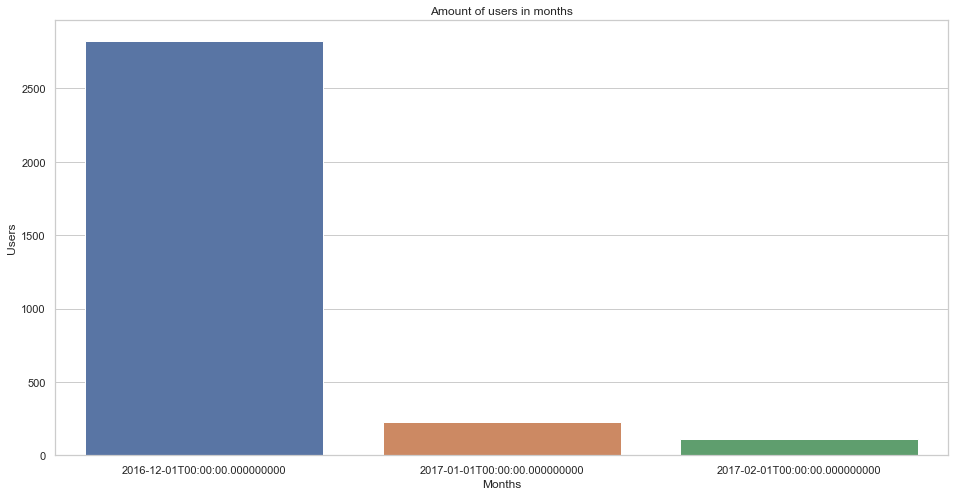

In [55]:
draw_bar('first_order_month','n_buyers', cohort_size, 'Amount of users in months', 'Users', 'Months', 0)

In [129]:
merged.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,date,week,month,year,price_per_one
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,2016-12-08,2016-12-01,2016-01-01,0.42
1,541104,21873,0,2017-01-13 14:29:00,None,0,Shop 0,2017-01-13,2017-01-12,2017-01-01,2017-01-01,0.42
2,540418,21873,1,2017-01-07 11:04:00,None,0,Shop 0,2017-01-07,2017-01-05,2017-01-01,2017-01-01,0.42
3,541516,21873,2,2017-01-18 17:34:00,None,0,Shop 0,2017-01-18,2017-01-12,2017-01-01,2017-01-01,0.42
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,2017-01-19,2017-01-19,2017-01-01,2017-01-01,0.42


In [130]:

merged.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,date,week,month,year,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,2016-12-08,2016-12-01,2016-01-01,0.42,4.62
1,541104,21873,0,2017-01-13 14:29:00,None,0,Shop 0,2017-01-13,2017-01-12,2017-01-01,2017-01-01,0.42,0.00
2,540418,21873,1,2017-01-07 11:04:00,None,0,Shop 0,2017-01-07,2017-01-05,2017-01-01,2017-01-01,0.42,0.42
3,541516,21873,2,2017-01-18 17:34:00,None,0,Shop 0,2017-01-18,2017-01-12,2017-01-01,2017-01-01,0.42,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,2017-01-19,2017-01-19,2017-01-01,2017-01-01,0.42,14.70


In [131]:
cohorts = merged.groupby(['month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head() 

,month,revenue
0,2016-12-01,361327.71
1,2017-01-01,321553.46
2,2017-02-01,292564.89


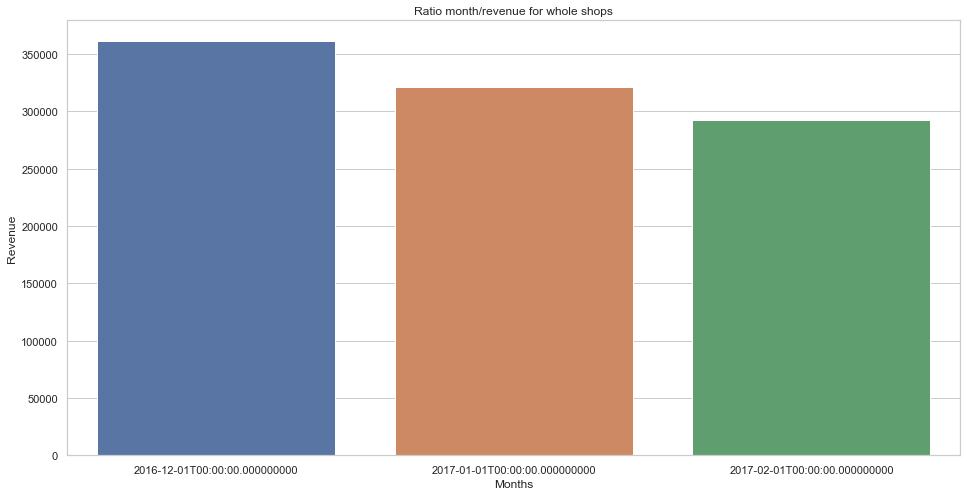

In [132]:
draw_barplot('month', 'revenue', cohorts, 'Ratio month/revenue for whole shops', 'Revenue', 'Months', 0)

* The graph shows that the maximum income was brought by the month of December, and then income snowballing occurs.

In [133]:
daily_revenue_quantity = merged.groupby(['date']).agg({'revenue': 'sum', 'Quantity':'sum'}).reset_index()
daily_revenue_quantity['ratio'] = daily_revenue_quantity['Quantity'] / daily_revenue_quantity['revenue']
daily_revenue_quantity.head()

,date,revenue,Quantity,ratio
0,2016-12-01,26913.22,23649,0.878713
1,2016-12-02,26914.11,18890,0.701862
2,2016-12-03,14341.68,12597,0.878349
3,2016-12-05,14747.20,13567,0.919971
4,2016-12-06,20183.17,17413,0.862749


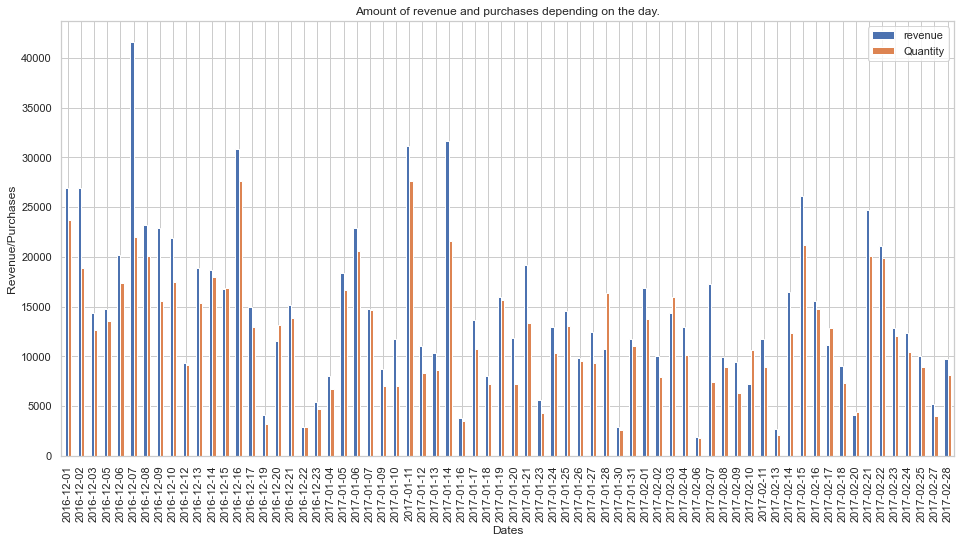

In [134]:
draw_2_plots(daily_revenue_quantity, 'date', 'revenue', 'Quantity', 'Amount of revenue and purchases depending on the day.', 'Revenue/Purchases', 'Dates')

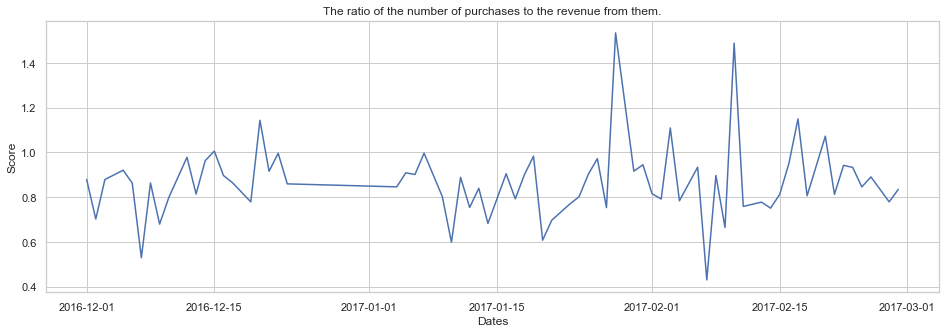

In [135]:
draw_plot(daily_revenue_quantity, 'date', 'ratio', 'The ratio of the number of purchases to the revenue from them.', 'Dates', 'Score')

In [136]:
cohorts.columns = ['first_order_month', 'revenue']
cohorts.head(30)

,first_order_month,revenue
0,2016-12-01,361327.71
1,2017-01-01,321553.46
2,2017-02-01,292564.89


In [137]:
report = pd.merge(cohort_size, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,revenue
0,2016-12-01,2822,361327.71
1,2017-01-01,229,321553.46
2,2017-02-01,108,292564.89


In [138]:
margine_rate = .5
report['global profit'] = report['revenue'] * margine_rate
report['LTV'] =  report['global profit'] / report['n_buyers']
report.head()

,first_order_month,n_buyers,revenue,global profit,LTV
0,2016-12-01,2822,361327.71,180663.855,64.019793
1,2017-01-01,229,321553.46,160776.730,702.081790
2,2017-02-01,108,292564.89,146282.445,1354.467083


In [139]:
shops_dist_revenue = merged.groupby('ShopID').agg({'revenue':'sum'}).sort_values(by='revenue', ascending=False).reset_index()
shops_dist_revenue.head()

,ShopID,revenue
0,Shop 15,111537.83
1,Shop 0,105171.58
2,Shop 5,63046.14
3,Shop 4,39778.52
4,Shop 20,39468.26


In [140]:
merged.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,date,week,month,year,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,2016-12-08,2016-12-01,2016-01-01,0.42,4.62
1,541104,21873,0,2017-01-13 14:29:00,None,0,Shop 0,2017-01-13,2017-01-12,2017-01-01,2017-01-01,0.42,0.00
2,540418,21873,1,2017-01-07 11:04:00,None,0,Shop 0,2017-01-07,2017-01-05,2017-01-01,2017-01-01,0.42,0.42
3,541516,21873,2,2017-01-18 17:34:00,None,0,Shop 0,2017-01-18,2017-01-12,2017-01-01,2017-01-01,0.42,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,2017-01-19,2017-01-19,2017-01-01,2017-01-01,0.42,14.70


### Test Hypothesis

Let us formulate hypotheses:
 - H_0 (the null hypothesis): there's not a statistically significant difference in conversion between without loyalty program and with loyalty program;
 - H_a (the alternative hypothesis): there is a statistically significant difference in conversion between without loyalty program and with loyalty program;

- [X] Check outliers.

- Revenue

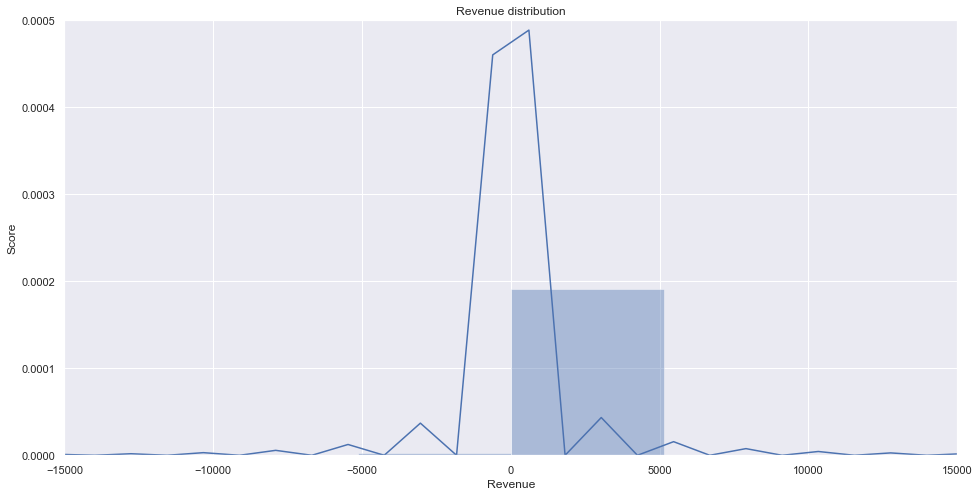

In [141]:
plot_dist(merged, 'revenue', 'Revenue distribution', 'Score', 'Revenue')

In [142]:
print(np.percentile(merged['revenue'], [90, 95, 99])) 

[ 18.15  32.45 119.99]


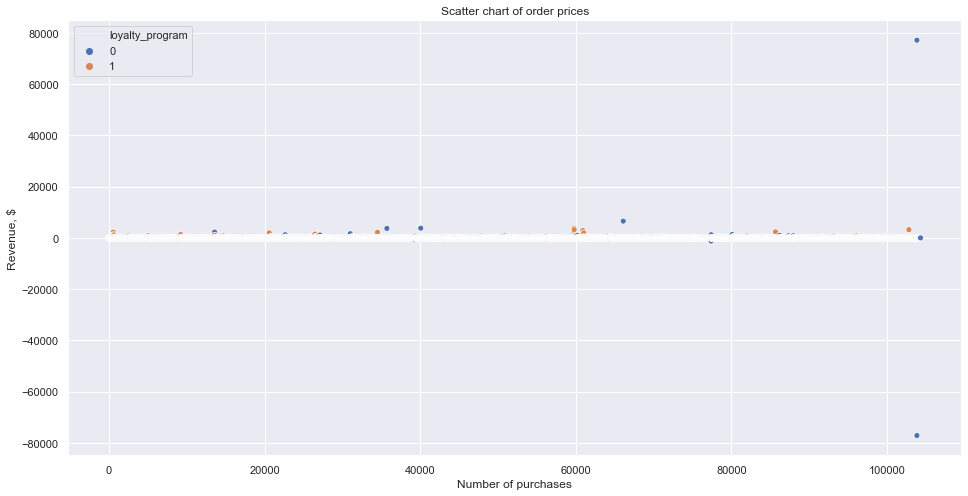

In [143]:
draw_outliers(merged, 'revenue', 'loyalty_program')

In [144]:
purchasesByCustomers = (
    merged.groupby('CustomerID', as_index=False)
    .agg({'purchaseid':pd.Series.nunique})
)
purchasesByCustomers.columns = ['CustomerID','Purchases']
print(purchasesByCustomers.sort_values(by='Purchases', ascending=False).head(10))

     CustomerID  Purchases
1749       None        748
142       18427         46
689       20285         38
1618      23529         35
884       20990         33
1614      23520         30
243       18768         29
779       20590         28
813       20740         21
664       20206         20


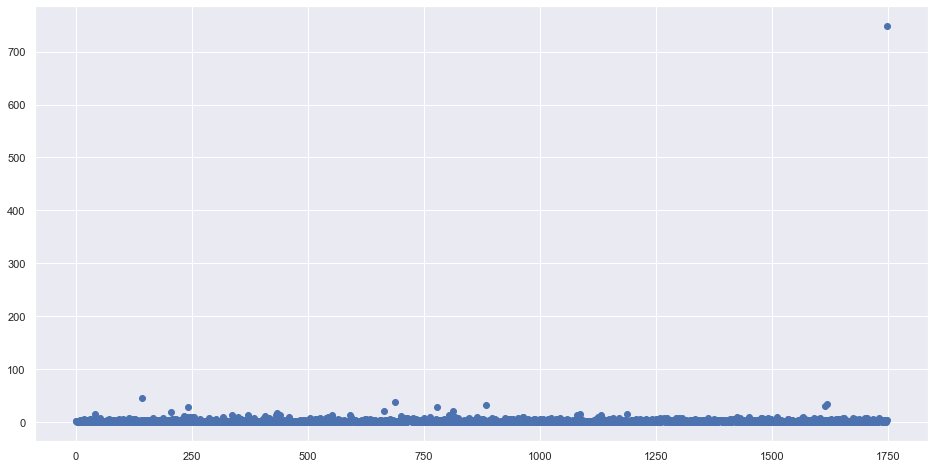

In [146]:
x_values = pd.Series(range(0,len(purchasesByCustomers)))
plt.scatter(x_values, purchasesByCustomers['Purchases'])

In [147]:
print(np.percentile(purchasesByCustomers['Purchases'], [90, 95, 99])) 

[ 5.  7. 14.]


Let's calculate the statistical significance of the difference in conversion between the groups.

In [148]:
purchasesByCustomersWithLoyalty = (
    merged.query('loyalty_program == "1"')
    .groupby('CustomerID', as_index=False)
    .agg({'purchaseid':pd.Series.nunique})
)
purchasesByCustomersWithLoyalty.columns = ['customerID', 'purchases'] 
display(purchasesByCustomersWithLoyalty.head())

,customerID,purchases
0,22005.0,2
1,22006.0,2
2,22011.0,1
3,22012.0,3
4,22018.0,1


In [149]:
purchasesByCustomersWithoutLoyalty = (
    merged.query('loyalty_program == "0"')
    .groupby('CustomerID', as_index=False)
    .agg({'purchaseid':pd.Series.nunique})
)
purchasesByCustomersWithoutLoyalty.columns = ['customerID', 'purchases'] 
display(purchasesByCustomersWithoutLoyalty.head())

,customerID,purchases
0,18025,2
1,18026,2
2,18027,2
3,18029,1
4,18031,1


In [150]:
merged.head()

,purchaseid,item_ID,Quantity,purchasedate,CustomerID,loyalty_program,ShopID,date,week,month,year,price_per_one,revenue
0,538280,21873,11,2016-12-10 12:50:00,18427,0,Shop 3,2016-12-10,2016-12-08,2016-12-01,2016-01-01,0.42,4.62
1,541104,21873,0,2017-01-13 14:29:00,None,0,Shop 0,2017-01-13,2017-01-12,2017-01-01,2017-01-01,0.42,0.00
2,540418,21873,1,2017-01-07 11:04:00,None,0,Shop 0,2017-01-07,2017-01-05,2017-01-01,2017-01-01,0.42,0.42
3,541516,21873,2,2017-01-18 17:34:00,None,0,Shop 0,2017-01-18,2017-01-12,2017-01-01,2017-01-01,0.42,0.84
4,541566,21873,35,2017-01-19 11:50:00,23401,1,Shop 22,2017-01-19,2017-01-19,2017-01-01,2017-01-01,0.42,14.70


In [153]:
sample_a = pd.concat([purchasesByCustomersWithLoyalty['purchases'],pd.Series(0, \
                    index=np.arange(merged[merged['loyalty_program']=='0']['purchaseid'].sum() - len(purchasesByCustomersWithLoyalty['purchases'])), name='orders')],axis=0)
sample_b = pd.concat([purchasesByCustomersWithLoyalty['purchases'],pd.Series(0, \
                    index=np.arange(merged[merged['loyalty_program']=='1']['purchaseid'].sum() - len(purchasesByCustomersWithLoyalty['purchases'])), name='orders')],axis=0)

C:\Users\Kanafin\Anaconda3\envs\pandas\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [159]:
alpha = 0.05
pvalue = stats.mannwhitneyu(sample_a, sample_b)[1]
print('p-value: ', pvalue)
if (pvalue < alpha):
    print("Null hypothesis rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we can't make conclusions about the difference") 

p-value:  0.4999628473971112
Failed to reject the null hypothesis: we can't make conclusions about the difference


There is no significant difference between having and not having a customer loyalty card.

In [157]:
print("{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print("{0:.3f}".format(sample_b.mean()/sample_a.mean()-1)) 

0.500
0.000


### Conclusion

* In general, the trading network has certain patterns: an increase in sales before the New Year holidays. Decrease in revenue during the holidays.
* Individual stores show different values in the presence / absence of loyalty cards. 
* The general conclusion is that the presence of loyalty cards does not matter, since the revenue without loyalty cards for stores is greater than with loyalty cards. People buy more, but the total revenue is less.